# untuk membaca file csv covid 19 indonesia.csv

In [3]:
import pandas as pd
test = pd.read_csv('covid 19 indonesia.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# Menampilkan statistik deskriptif dari dataset

In [4]:
test.describe(include='all')

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822,31822,31822,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822,31822,29883.000000,28375.000000
unique,930,35,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1328,6170,NaN,NaN
top,8/29/2022,ID-JK,DKI Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,0.00%,NaN,NaN
freq,35,929,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,393,205,NaN,NaN
mean,NaN,NaN,NaN,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,...,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,NaN,NaN,1.326795,1.033834
std,NaN,NaN,NaN,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,...,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,NaN,NaN,2.679379,1.351755
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,...,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,...,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,NaN,NaN,0.650000,0.750000
50%,NaN,NaN,NaN,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,...,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,NaN,NaN,1.000000,1.000000
75%,NaN,NaN,NaN,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,...,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,NaN,NaN,1.310000,1.000000


# Memeriksa jumlah nilai yang hilang di setiap kolom

In [5]:
missing_values = test.isnull().sum()
missing_values[missing_values > 0]

City or Regency                31822
Province                         929
Island                           929
Time Zone                        929
Special Status                 27264
Total Cities                     901
Total Urban Villages             904
Total Rural Villages             929
Growth Factor of New Cases      1939
Growth Factor of New Deaths     3447
dtype: int64

# memisahkan kedua data

In [6]:
less = missing_values[missing_values < 20.000].index
over = missing_values[missing_values >= 20.000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik

In [7]:
numeric_features = test[less].select_dtypes(include=['number']).columns
test[numeric_features] = test[numeric_features].fillna(test[numeric_features]
.median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori

In [8]:
kategorical_features = test[less].select_dtypes(include=['object']).columns
for column in kategorical_features:
    test[column] = test[column].fillna(test[column].mode()[0])

# # Menghapus kolom dengan terlalu banyak nilai yang hilang

In [9]:
df = test.drop(columns=over)

# pemeriksaan data yang sudah dilewati dengan tahapan verifikasi missing_values

In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

# memeriksa dataset apakah memiliki outlier atau tidak

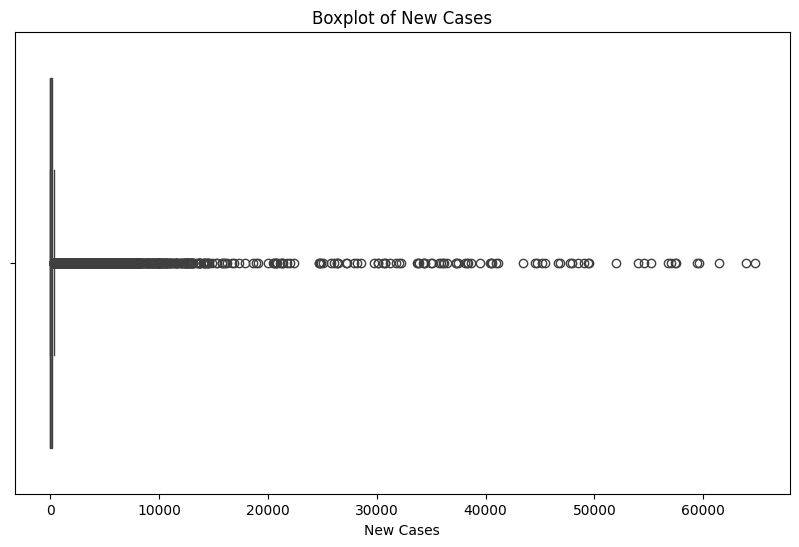

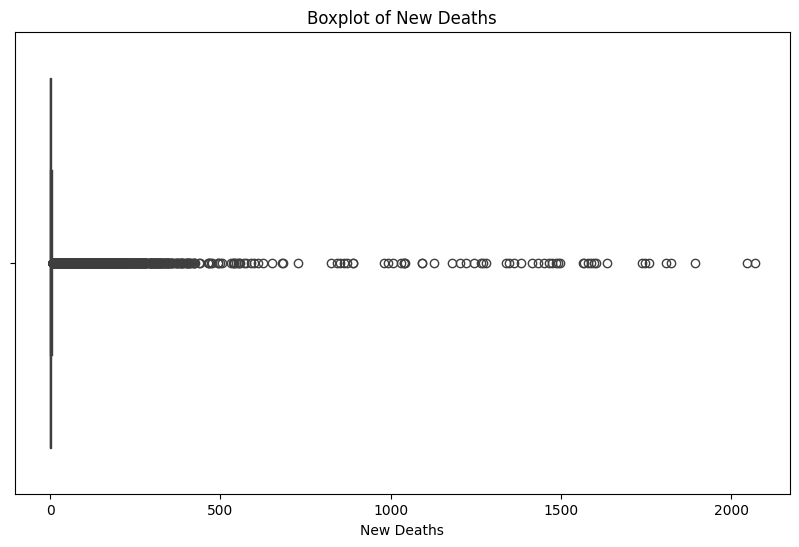

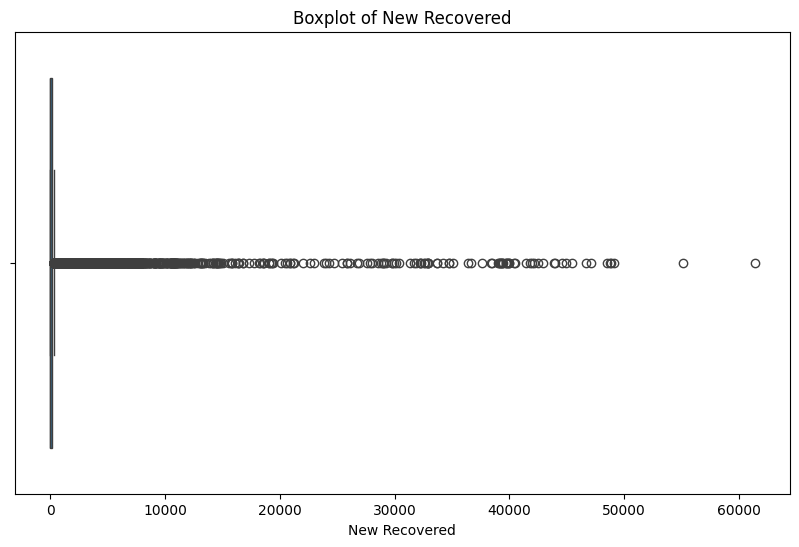

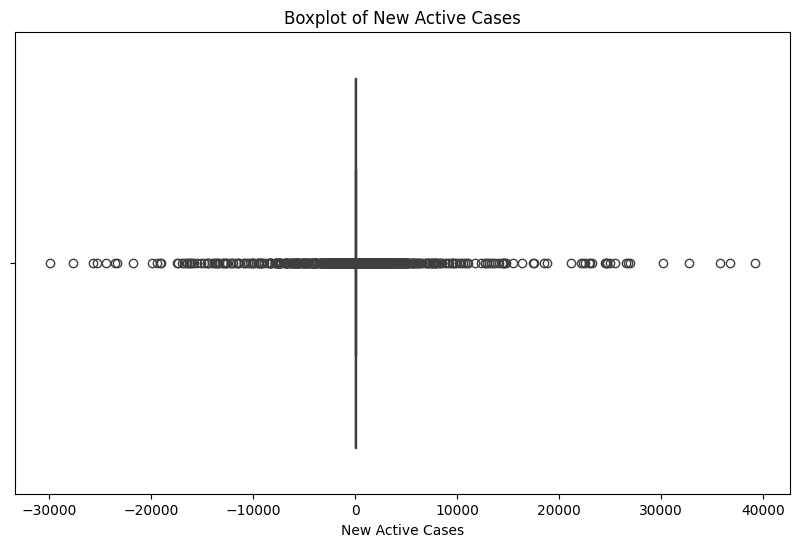

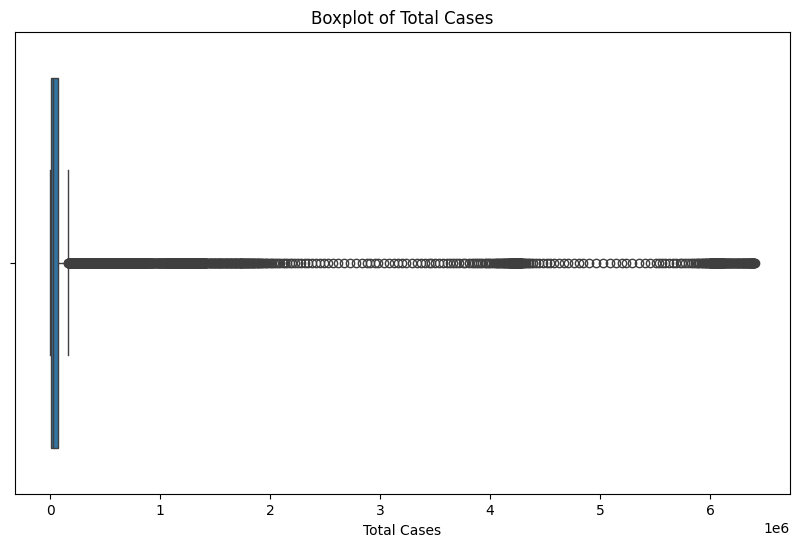

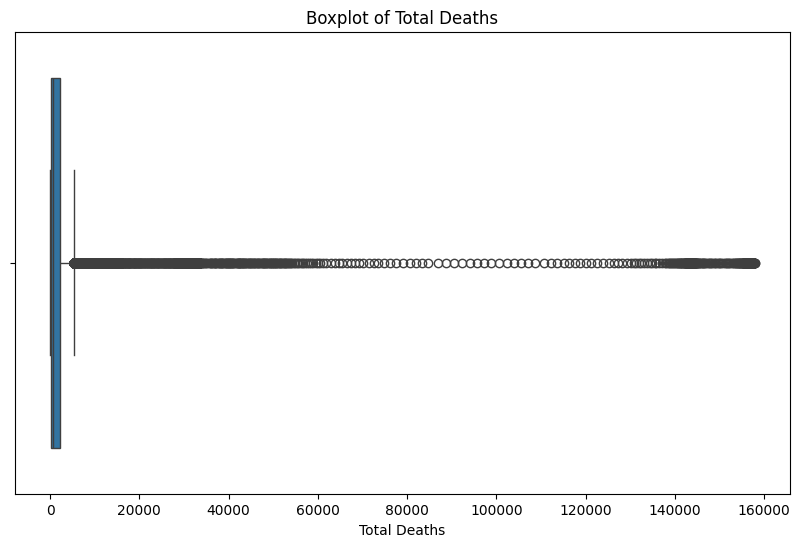

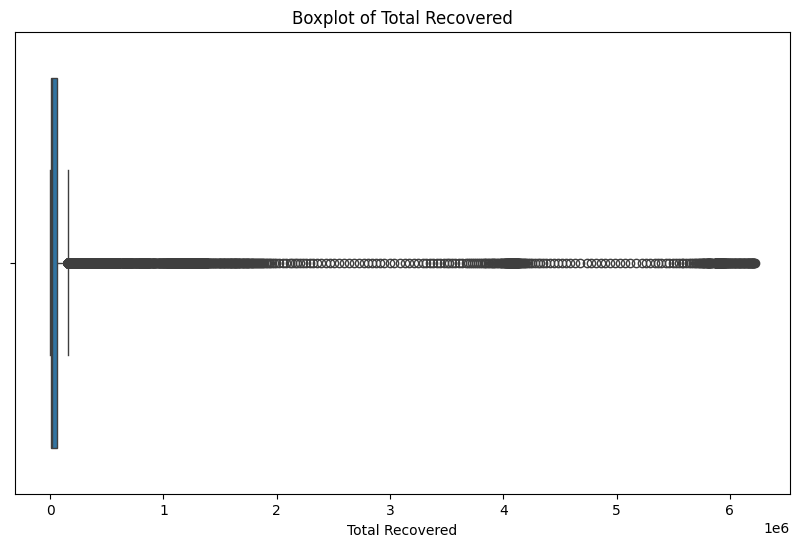

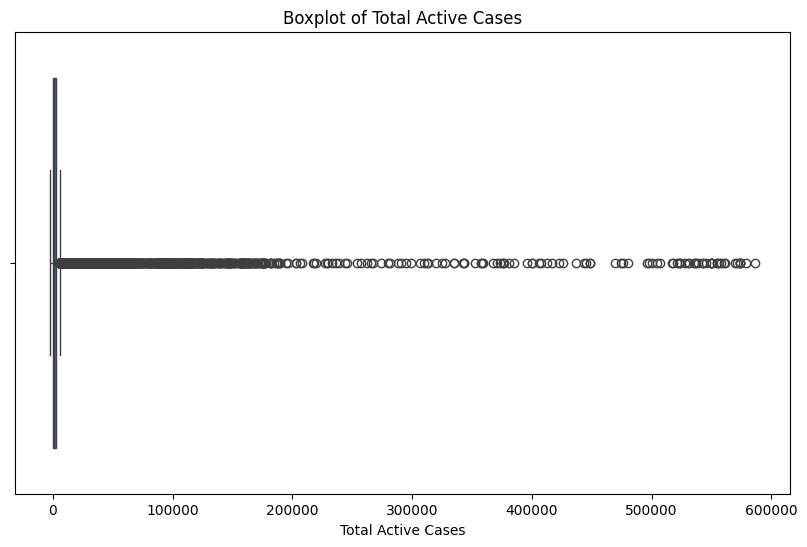

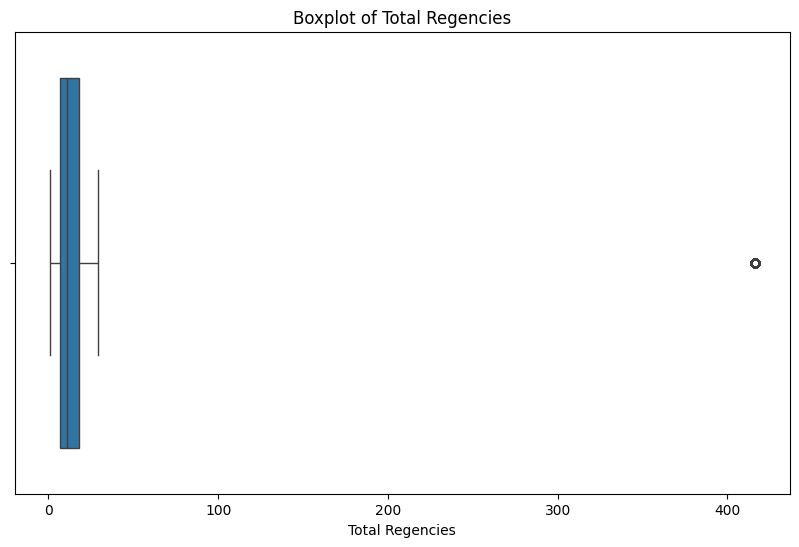

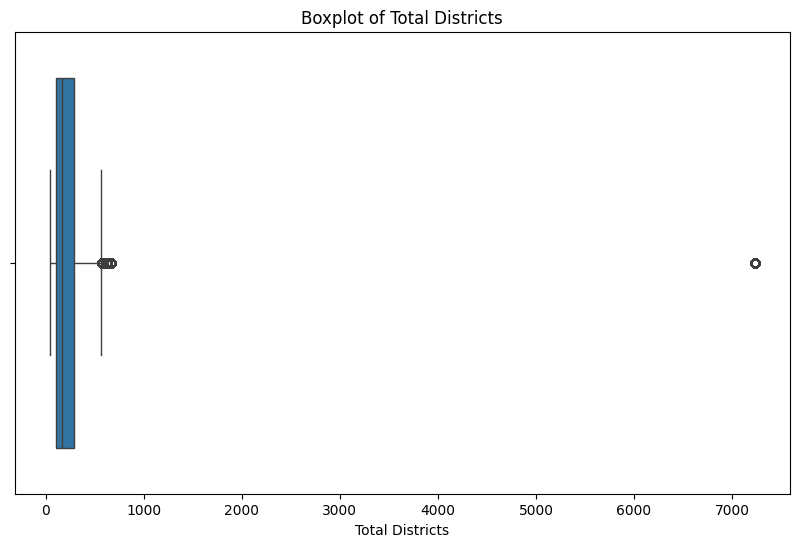

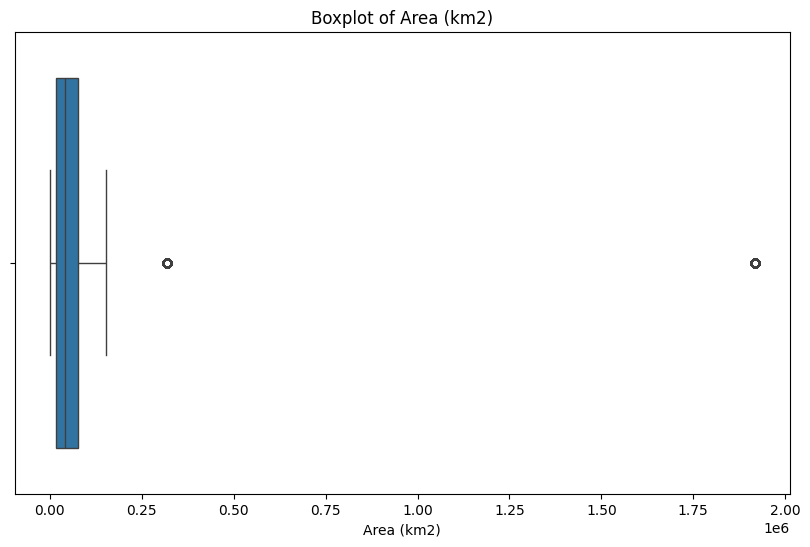

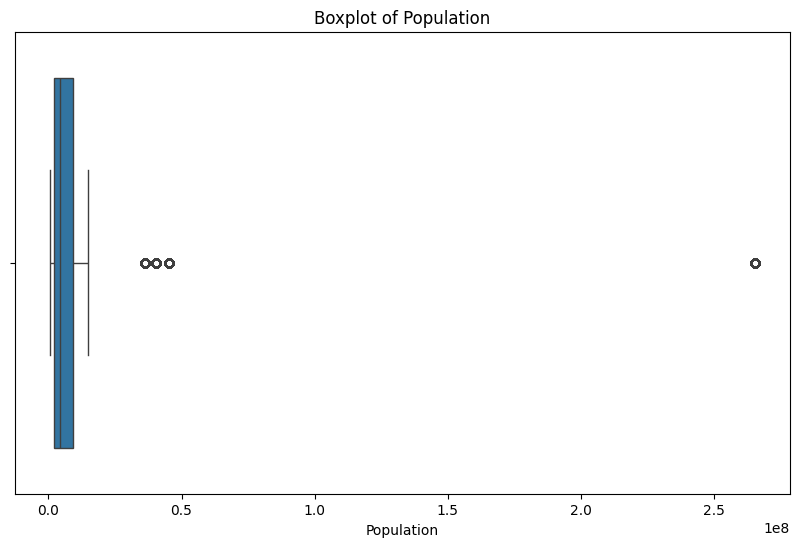

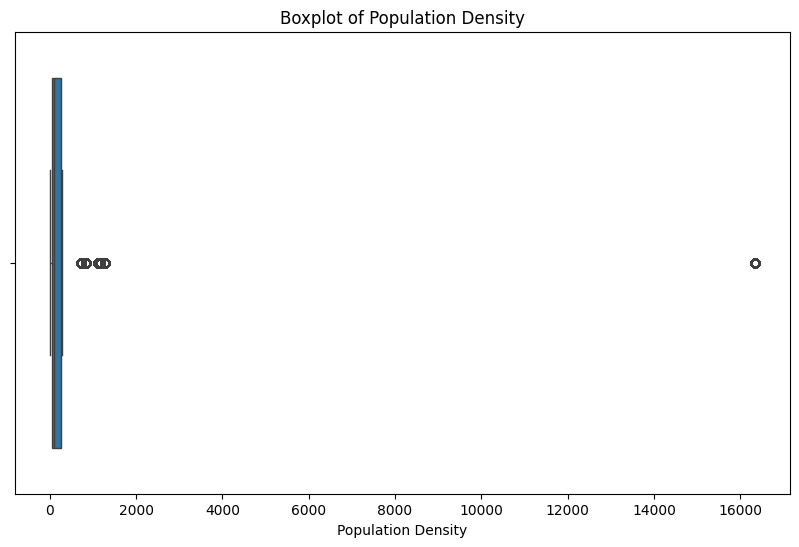

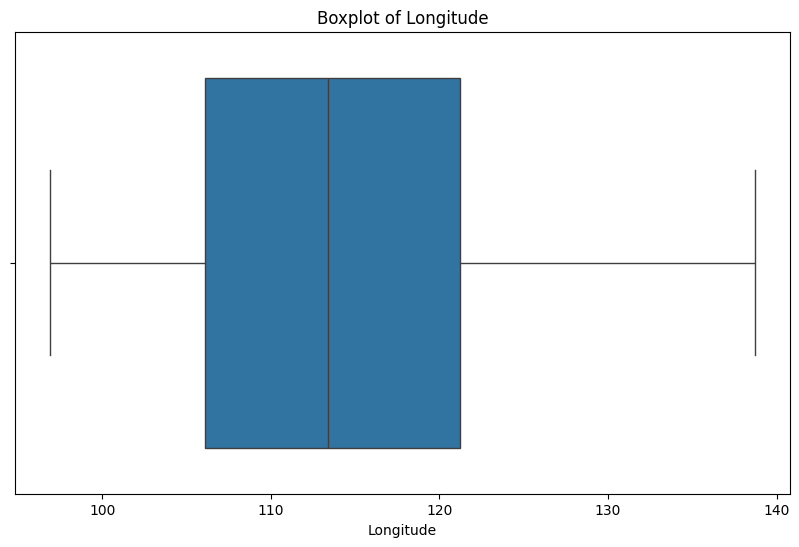

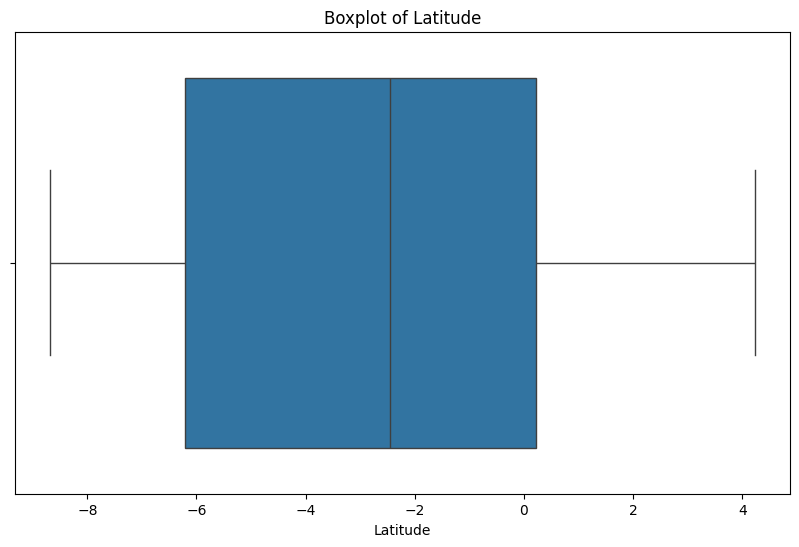

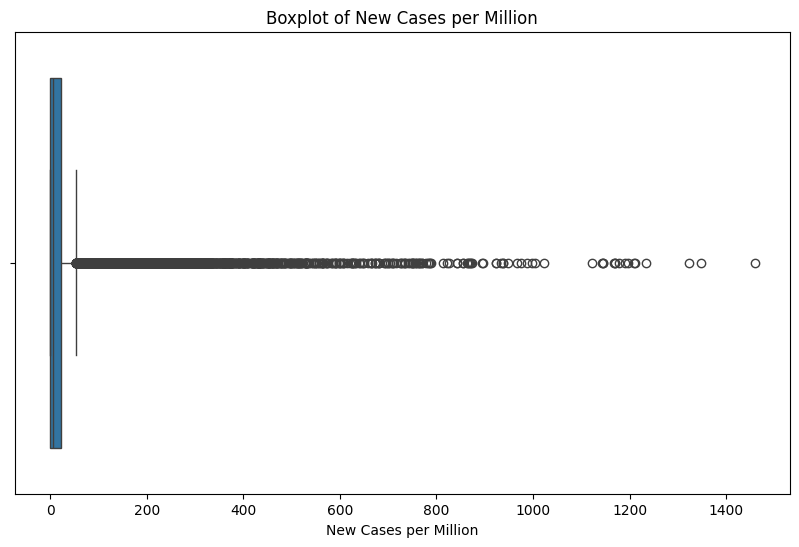

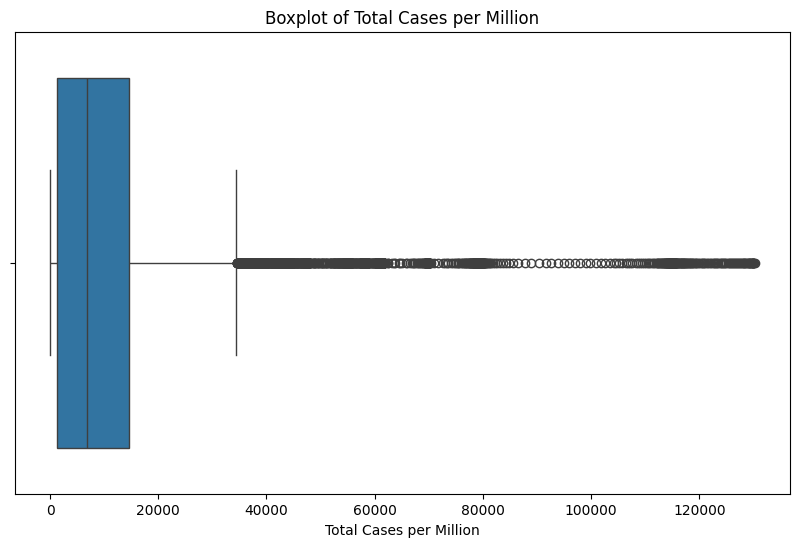

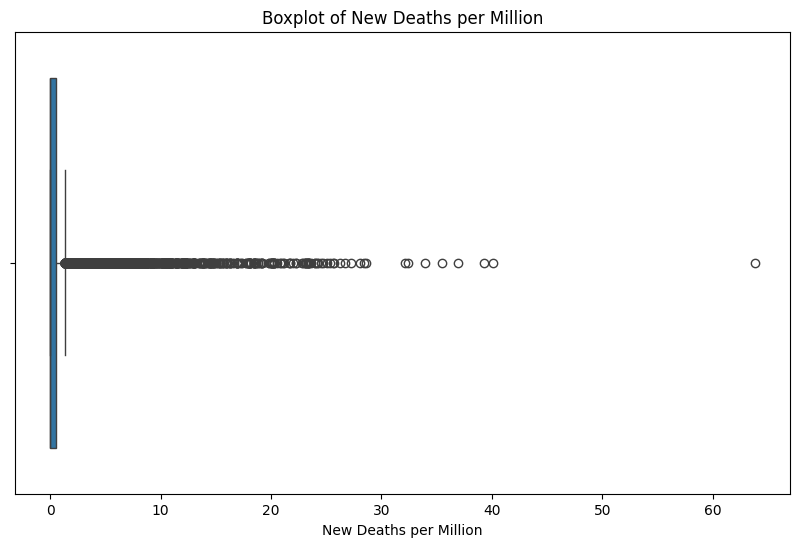

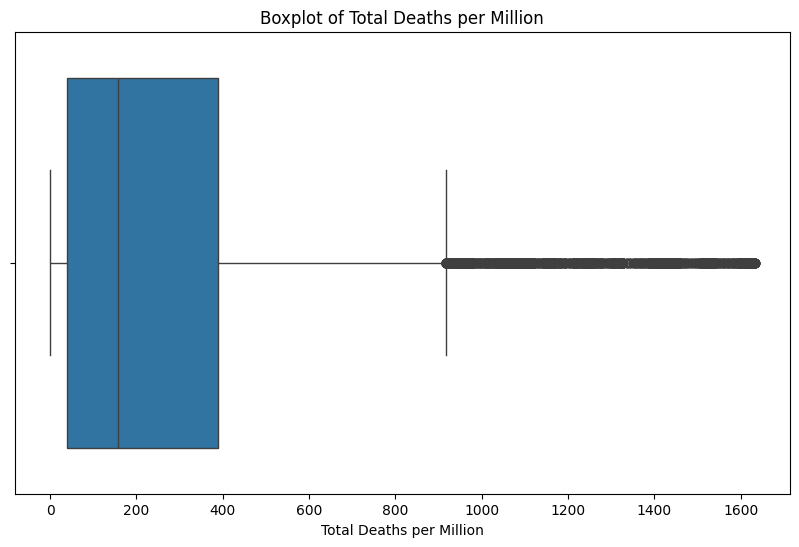

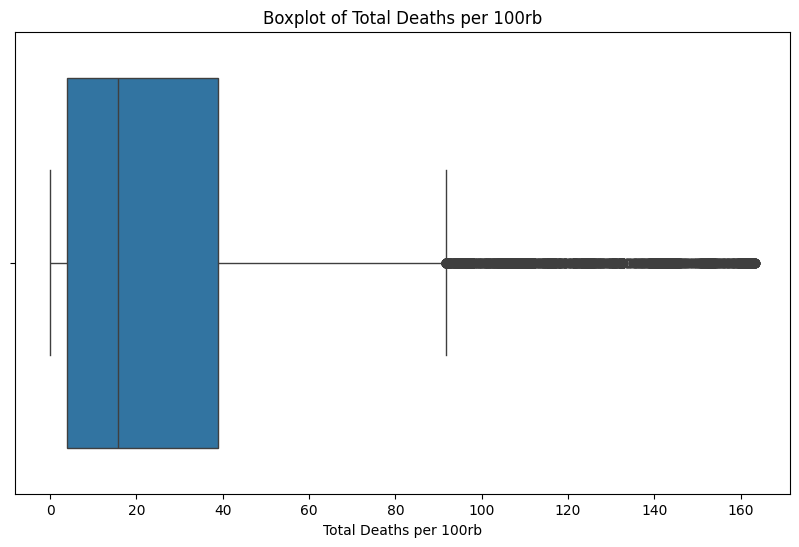

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR

In [12]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik

In [13]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 +
1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16747 entries, 3 to 31819
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   New Cases                 16747 non-null  int64  
 1   New Deaths                16747 non-null  int64  
 2   New Recovered             16747 non-null  int64  
 3   New Active Cases          16747 non-null  int64  
 4   Total Cases               16747 non-null  int64  
 5   Total Deaths              16747 non-null  int64  
 6   Total Recovered           16747 non-null  int64  
 7   Total Active Cases        16747 non-null  int64  
 8   Total Regencies           16747 non-null  int64  
 9   Total Districts           16747 non-null  int64  
 10  Area (km2)                16747 non-null  int64  
 11  Population                16747 non-null  int64  
 12  Population Density        16747 non-null  float64
 13  Longitude                 16747 non-null  float64
 14  Latitude   

In [ ]:
df.head(200)

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,...,Total Deaths per Million,Total Deaths per 100rb,Date,Location ISO Code,Location,Location Level,Country,Continent,Case Fatality Rate,Case Recovered Rate
3,1,0,0,1,1,0,1,0,10,169,...,0.00,0.00,3/2/2020,ID-RI,Riau,Province,Indonesia,Asia,0.00%,100.00%
7,0,0,0,0,1,0,1,0,10,169,...,0.00,0.00,3/3/2020,ID-RI,Riau,Province,Indonesia,Asia,0.00%,100.00%
11,0,0,0,0,1,0,1,0,10,169,...,0.00,0.00,3/4/2020,ID-RI,Riau,Province,Indonesia,Asia,0.00%,100.00%
15,0,0,0,0,1,0,1,0,10,169,...,0.00,0.00,3/5/2020,ID-RI,Riau,Province,Indonesia,Asia,0.00%,100.00%
20,0,0,0,0,1,0,1,0,10,169,...,0.00,0.00,3/6/2020,ID-RI,Riau,Province,Indonesia,Asia,0.00%,100.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,1,1,0,0,5,75,...,0.52,0.05,3/26/2020,ID-KR,Kepulauan Riau,Province,Indonesia,Asia,100.00%,0.00%
251,2,0,0,2,2,0,0,2,13,228,...,0.00,0.00,3/26/2020,ID-LA,Lampung,Province,Indonesia,Asia,0.00%,0.00%
252,0,0,0,0,1,1,1,-1,9,118,...,0.54,0.05,3/26/2020,ID-MA,Maluku,Province,Indonesia,Asia,100.00%,100.00%
253,0,0,0,0,1,0,0,1,8,116,...,0.00,0.00,3/26/2020,ID-MU,Maluku Utara,Province,Indonesia,Asia,0.00%,0.00%
